## Introduction

In this assignment, you will develop a basic understanding of risk analytics in banking and financial services and understand how data is used to minimise the risk of losing money while lending to customers.

In this notebook, we are going to analyzing **application_data.csv** i.e. data about current application of loan and **previous_application.csv** i.e. data about previous application of loan.


## Approach

**--> Import Modules**

**--> Read the dataset**

**--> Data Cleaning**

   - We have divided the features into small segments and anlyzed segment-wise using a smaller dataframe containing only relevant categories.
   - Fixing Rows and Columns - removing unncessary rows/columns (through missing value handling and correlation)
   - Data Cleaning, Missing Data Handling, Handling Outliers, Type casting are done segment-wise.
   - Plots and percentage wise Defaulter calculation are done segment-wise as well.
	
**--> Univariate Analysis**
	
**--> Bivariate and Multivariate Analysis**

In [1]:
# For suppressing Warnings

import warnings
warnings.filterwarnings("ignore")

In [2]:
### Reading the dataset

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
plt.style.use('ggplot')

In [4]:
# search opendatasets jovian on google. open github find bellow command
!pip install opendatasets --upgrade --quiet

In [5]:
import opendatasets as od

kaggle_url = 'https://www.kaggle.com/datasets/arkapravasen/bank-loan-default'

od.download(kaggle_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: emchandrakant
Your Kaggle Key: ········


100%|███████████████████████████████████████████████████████████████████████████████| 112M/112M [00:23<00:00, 5.12MB/s]



Skipping, found downloaded files in ".\bank-loan-default" (use force=True to force download)


In [6]:
data_filename1 = './bank-loan-default/application_data.csv'
data_filename2 = './bank-loan-default/previous_application.csv'

In [7]:
# If you have dataset already at local use bellow two lines else download from kaggle then use last two lines
# application_data = pd.read_csv("application_data.csv")
# previous_application = pd.read_csv("previous_application.csv")
application_data = pd.read_csv(data_filename1)
previous_application = pd.read_csv(data_filename2)

In [8]:
application_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
previous_application.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


# 

In [7]:
## Reading information of dataset
application_data.info(verbose=True,null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Non-Null Count   Dtype  
---   ------                        --------------   -----  
 0    SK_ID_CURR                    307511 non-null  int64  
 1    TARGET                        307511 non-null  int64  
 2    NAME_CONTRACT_TYPE            307511 non-null  object 
 3    CODE_GENDER                   307511 non-null  object 
 4    FLAG_OWN_CAR                  307511 non-null  object 
 5    FLAG_OWN_REALTY               307511 non-null  object 
 6    CNT_CHILDREN                  307511 non-null  int64  
 7    AMT_INCOME_TOTAL              307511 non-null  float64
 8    AMT_CREDIT                    307511 non-null  float64
 9    AMT_ANNUITY                   307499 non-null  float64
 10   AMT_GOODS_PRICE               307233 non-null  float64
 11   NAME_TYPE_SUITE               306219 non-null  object 
 12   NAME_INCOME_TYPE            

In [6]:
## Reading information of dataset
previous_application.info(verbose=True,null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

**Comment:**
    

- previous_application contains 37 features and 1670214 rows
 
 (Out of which 15 features are float64, 6 features are integer, 16 features are object datatype)
 
 
- application_data contains 122 features, 1 target variable, and 307511 rows

 (Out of which 65 features are float64, 41 features are integer, 16 features are object datatype)


In [8]:
# Additional columns and common columns in application_data and previous_application
additional_feat = []
common_feat = []

for col in application_data.columns:
    if col not in previous_application.columns:
        additional_feat.append(col)
    else:
        common_feat.append(col)
        
print(len(additional_feat))
print(len(common_feat))
print(common_feat)

114
8
['SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START']


**Comment:**

SK_ID_CURR is an unique identifier, which will use to merge the relevant columns of 2 dataframes.

 # 

#### Function Definations

In [21]:
'''
Function_name : missingdata_percentage
Usage : Returns % of missing values for all features in a DataFrame
Arguments : dataframe
Returns : a dataframe containing categories having missing values and % of missing values in those categories
'''
def missingdata_percentage(df):
    missing = pd.DataFrame(columns=['category','percentage'])
    for col in df.columns:
        if df[col].isna().values.any():
            percentage = 100*df[col].isna().sum()/df.shape[0]
            missing = missing.append({'category' : col, 'percentage' : percentage}, ignore_index=True)
    return missing

In [22]:
'''
Function_name : value_wise_defaulter_percentage
Usage : Returns % of defaulters for every unique value of a column(Categorical)
Arguments : dataframe, column
Returns : a dataframe containing unique values of a caterory and % of defaulters
'''

def value_wise_defaulter_percentage(df, col):
    new_df = pd.DataFrame(columns=['Value', 'Percentage of Defaulter'])
    
    for value in df[col].unique():
        default_cnt = df[(df[col] == value) & (df.TARGET == 1)].shape[0]
        total_cnt = df[df[col] == value].shape[0]
        new_df = new_df.append({'Value' : value , 'Percentage of Defaulter' : (default_cnt*100/total_cnt)}, ignore_index=True)
    return new_df.sort_values(by='Percentage of Defaulter', ascending=False)

 # 

In [10]:
missingdata_percentage(application_data).sort_values('percentage', ascending=False)

,category,percentage
41,COMMONAREA_MEDI,69.872297
13,COMMONAREA_AVG,69.872297
27,COMMONAREA_MODE,69.872297
49,NONLIVINGAPARTMENTS_MEDI,69.432963
35,NONLIVINGAPARTMENTS_MODE,69.432963
...,...,...
7,EXT_SOURCE_2,0.214626
1,AMT_GOODS_PRICE,0.090403
0,AMT_ANNUITY,0.003902
5,CNT_FAM_MEMBERS,0.000650


**Comment:**  
Removing columns from application_data which are having more than 40% null values

In [11]:
null_percentage = application_data.isnull().mean()

# Below code gives list of columns having more than 40% null
col_to_drop = null_percentage[null_percentage>0.4].index

application_data.drop(col_to_drop, axis=1, inplace=True)
application_data.shape

(307511, 73)

In [12]:
missingdata_percentage(previous_application).sort_values('percentage', ascending=False)

,category,percentage
5,RATE_INTEREST_PRIMARY,99.643698
6,RATE_INTEREST_PRIVILEGED,99.643698
2,AMT_DOWN_PAYMENT,53.636480
4,RATE_DOWN_PAYMENT,53.636480
7,NAME_TYPE_SUITE,49.119754
10,DAYS_FIRST_DRAWING,40.298129
11,DAYS_FIRST_DUE,40.298129
12,DAYS_LAST_DUE_1ST_VERSION,40.298129
13,DAYS_LAST_DUE,40.298129
14,DAYS_TERMINATION,40.298129


**Observation:** There are 16 features in previous_application that have missing values.
    
- Permanently dropping the features (RATE_INTEREST_PRIMARY and RATE_INTEREST_PRIVILEGED) as 99% data is missing. 

- Dropping rows containing missing values for the features(AMT_CREDIT and PRODUCT_COMBINATION) for very low % of missing data. 
Dropping entries would not cause impact the analysis as percentage of missing value is very low (~2%).

In [13]:
previous_application.drop(['RATE_INTEREST_PRIMARY','RATE_INTEREST_PRIVILEGED'], axis=1, inplace=True)
previous_application.dropna(subset=['AMT_CREDIT','PRODUCT_COMBINATION'], inplace=True)

#Checking the remaining columns
previous_application.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


# 

### Checking Data Imbalance

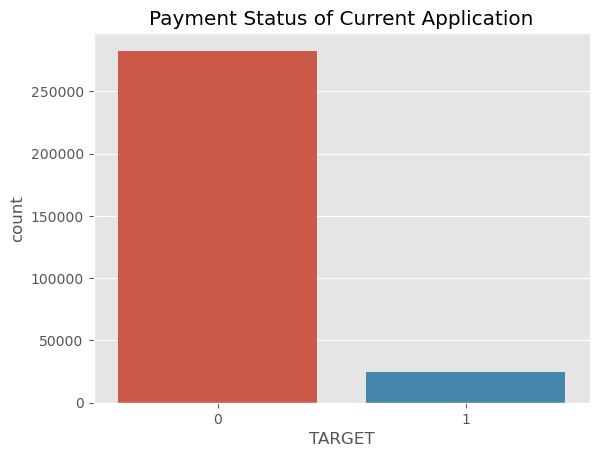

In [14]:
plt.title("Payment Status of Current Application")
sns.countplot(data=application_data, x='TARGET')
plt.show()


In [15]:
application_data.TARGET.value_counts(normalize=True)

0    0.919271
1    0.080729
Name: TARGET, dtype: float64

**Comment:** 
This data is highly imbalanced as number of defaulter is very less in total population.
Percentage of defaulters:  8.072 %

Data Imbalance Ratio: 
Defaulter : Non-Defaulter = 8 : 92

# 

### Segment 1: Documents Submitted by Applicant

Here we are analyzing 'FLAG_DOCUMENT_2','FLAG_DOCUMENT_3',...,'FLAG_DOCUMENT_21' columns.
Our goal to understand whether trend of document submission and identify impact on TARGET variable(if any).

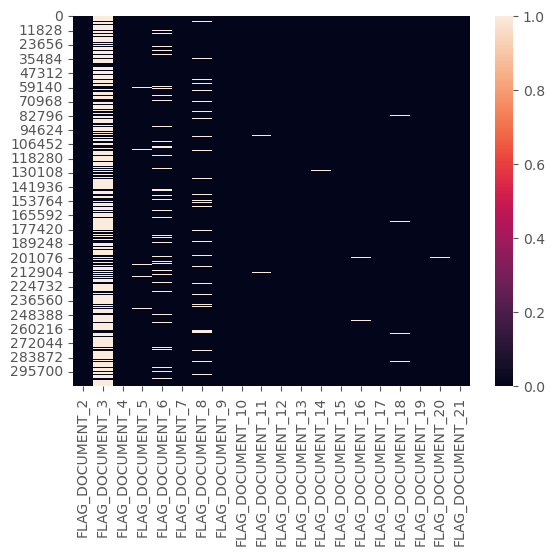

In [16]:
starting_idx = application_data.columns.get_loc("FLAG_DOCUMENT_2")
ending_idx = application_data.columns.get_loc("FLAG_DOCUMENT_21")+1

sns.heatmap(application_data.iloc[:,starting_idx:ending_idx])
plt.show()

**Comment:**
- The heatmap suggests majority people provided document 3 only.
- Lets assume all the document (except document 3) will not contribute towards analyzing the data. Hence all this columns can be dropped.

Lets check if Document 3 is of any use by analyzing it with defaulters and non-defaulters.

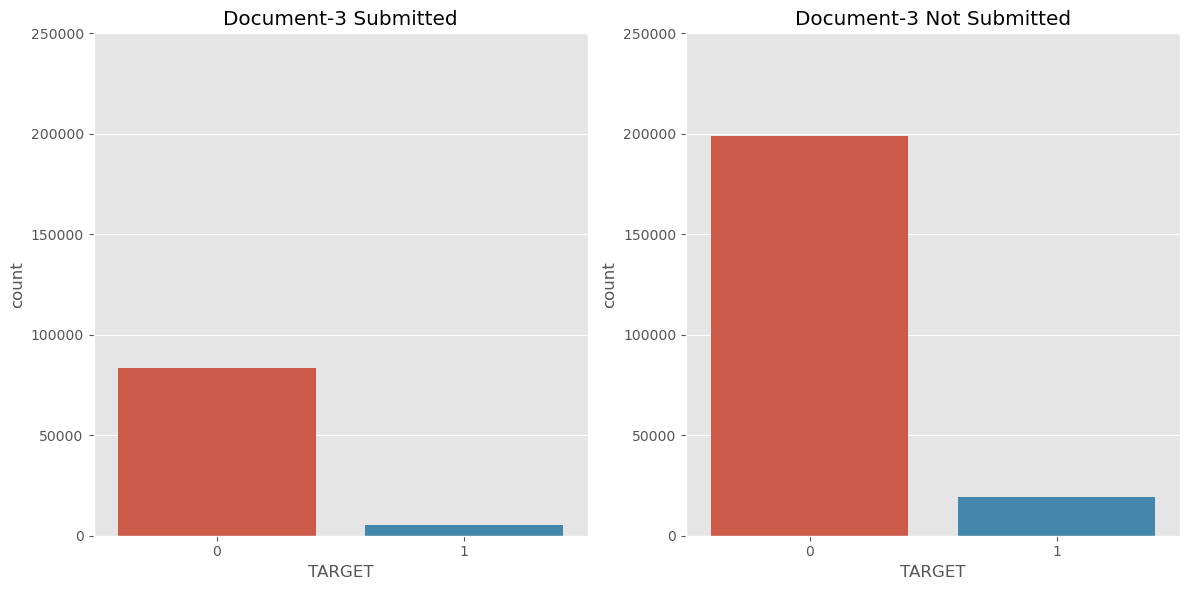

In [17]:
# Using equal ylim to for better visibilty

fig = plt.figure(figsize=(12,6))

ax1 = fig.add_subplot(1, 2, 1, ylim=(0,250000), title="Document-3 Submitted")
ax2 = fig.add_subplot(1, 2, 2, ylim=(0,250000), title="Document-3 Not Submitted")

sns.countplot(data = application_data[application_data["FLAG_DOCUMENT_3"] == 0], x="TARGET", ax=ax1)
sns.countplot(data = application_data[application_data["FLAG_DOCUMENT_3"] == 1], x="TARGET", ax=ax2)

plt.tight_layout()

plt.show()

**Comment:**
- FLAG_DOCUMENT_3 is showing similar trend for both non-defaulters and defaulters.
- Hence, this column can be dropped.

In [18]:
# Lets drop then..

print(application_data.shape)
unwanted_cols = application_data.iloc[:,starting_idx:ending_idx]
application_data.drop(labels=unwanted_cols, axis=1, inplace=True)
print(application_data.shape)

(307511, 73)
(307511, 53)


# 

### Segment 2 : Housing Information of Applicant

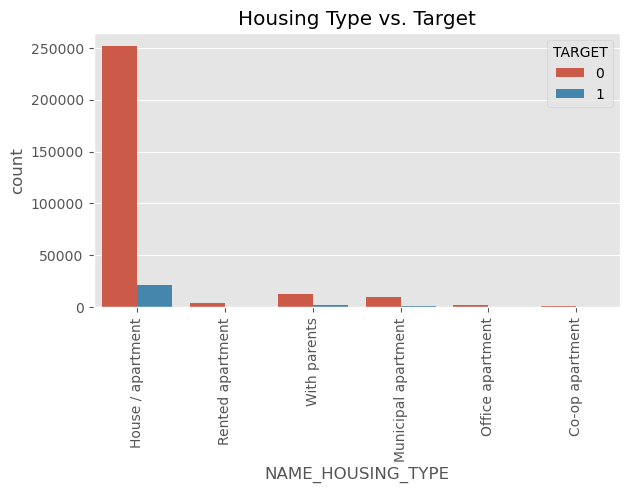

In [19]:
plt.figure()
sns.countplot(data = application_data, x="NAME_HOUSING_TYPE", hue=application_data["TARGET"])
plt.xticks(rotation=90)
plt.tight_layout()
plt.title("Housing Type vs. Target")
plt.show()

In [23]:
value_wise_defaulter_percentage(application_data, 'NAME_HOUSING_TYPE')

,Value,Percentage of Defaulter
1,Rented apartment,12.313051
2,With parents,11.698113
3,Municipal apartment,8.539748
5,Co-op apartment,7.932264
0,House / apartment,7.795711
4,Office apartment,6.572411


**Comment:**
- Mostly of the applicants live in House/Apartment
- Applicants living with their parents or in rented apartment have higher rate of default.

# 

### Segment 3 :Social Circle Info

In [24]:
start_idx = application_data.columns.get_loc('OBS_30_CNT_SOCIAL_CIRCLE')
end_idx = application_data.columns.get_loc('DEF_60_CNT_SOCIAL_CIRCLE')

social_circle_df = application_data.iloc[:, start_idx:end_idx+1]

social_circle_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 4 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   OBS_30_CNT_SOCIAL_CIRCLE  306490 non-null  float64
 1   DEF_30_CNT_SOCIAL_CIRCLE  306490 non-null  float64
 2   OBS_60_CNT_SOCIAL_CIRCLE  306490 non-null  float64
 3   DEF_60_CNT_SOCIAL_CIRCLE  306490 non-null  float64
dtypes: float64(4)
memory usage: 9.4 MB


In [25]:
social_circle_df.describe()

,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE
count,306490.000000,306490.000000,306490.000000,306490.000000
mean,1.422245,0.143421,1.405292,0.100049
std,2.400989,0.446698,2.379803,0.362291
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000
75%,2.000000,0.000000,2.000000,0.000000
max,348.000000,34.000000,344.000000,24.000000


<AxesSubplot:>

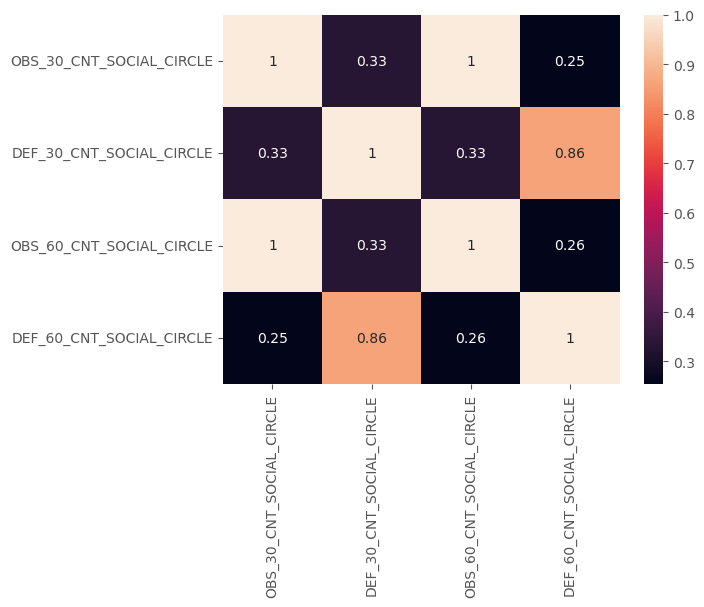

In [26]:
sns.heatmap(social_circle_df.corr(), annot=True)

**Comment:**
- DEF_30_CNT_SOCIAL_CIRCLE and DEF_60_CNT_SOCIAL_CIRCLE are highly correlated
- OBS_30_CNT_SOCIAL_CIRCLE and OBS_60_CNT_SOCIAL_CIRCLE are identical columns

In [27]:
non_default = application_data[application_data["TARGET"] == 0]
default = application_data[application_data["TARGET"] == 1]

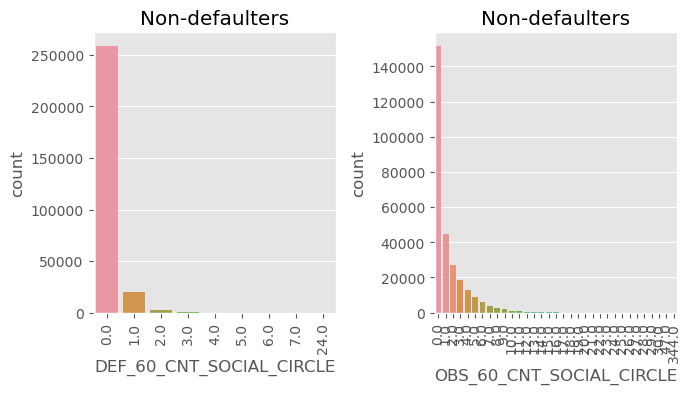

In [28]:
fig=plt.subplots(figsize=(7,7))

for i, j in enumerate(['DEF_60_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE']):
    plt.subplot(2, 2, i+1)
    plt.subplots_adjust(hspace = 1.0)
    sns.countplot(data=non_default, x=j)
    plt.title("Non-defaulters")
    plt.xticks(rotation=90)
    plt.tight_layout()

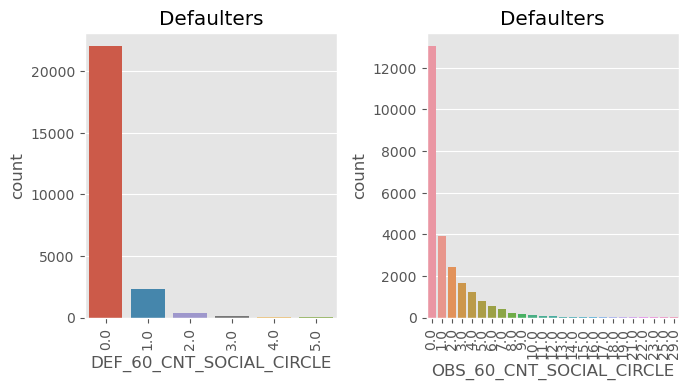

In [29]:
fig=plt.subplots(figsize=(7,7))

for i, j in enumerate(['DEF_60_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE']):
    plt.subplot(2, 2, i+1)
    plt.subplots_adjust(hspace = 1.0)
    sns.countplot(data=default, x=j)
    plt.title("Defaulters")
    plt.xticks(rotation=90)
    plt.tight_layout()

**Comment:**
- For defaulter and non-defaulter 'DEF_60_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE' features show similar trend.

# 

### Segment 4 : Region related data

In [30]:
start_idx = application_data.columns.get_loc('REG_REGION_NOT_LIVE_REGION')
end_idx = application_data.columns.get_loc('LIVE_CITY_NOT_WORK_CITY')

region_df = application_data.iloc[:, start_idx:end_idx+1]

In [31]:
region_df['REGION_RATING_CLIENT'] = application_data['REGION_RATING_CLIENT']
region_df['REGION_RATING_CLIENT_W_CITY'] = application_data['REGION_RATING_CLIENT_W_CITY']
region_df["TARGET"] = application_data["TARGET"]

<AxesSubplot:>

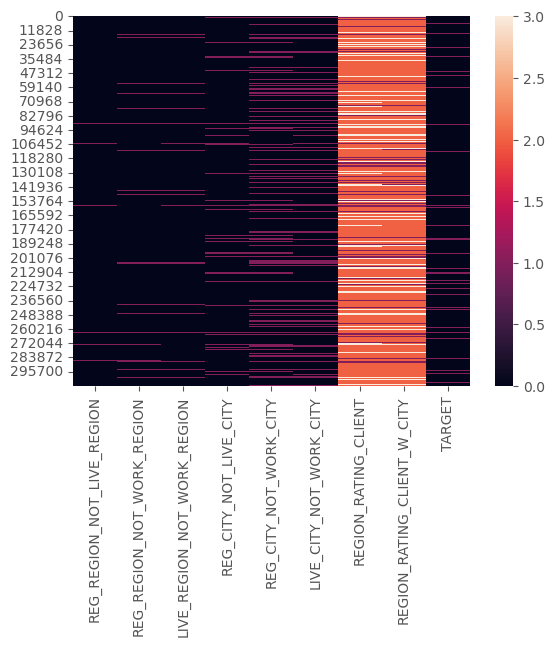

In [32]:
sns.heatmap(region_df)

**Comment:**
- All the features are labeled as 0 and 1
- REG_REGION_NOT_LIVE_REGION mostly contains 0, hence can be removed
- REG_REGION_NOT_WORK_REGION, LIVE_REGION_NOT_WORK_REGION columns are identical, hence one of them can be removed
- REG_CITY_NOT_WORK_CITY, LIVE_CITY_NOT_WORK_CITY columns are identical, hence one of them can be removed

In [33]:
# Lets drop then..

print(application_data.shape)
unwanted_cols = application_data[['REG_REGION_NOT_LIVE_REGION','LIVE_REGION_NOT_WORK_REGION','LIVE_CITY_NOT_WORK_CITY']]
application_data.drop(labels=unwanted_cols, axis=1, inplace=True)
print(application_data.shape)

(307511, 53)
(307511, 50)


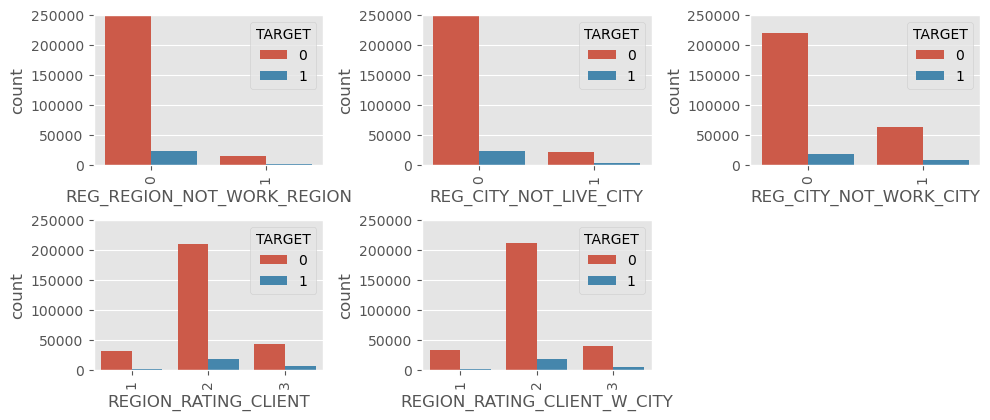

In [34]:
fig=plt.subplots(figsize=(10, 10))

for i, j in enumerate(['REG_REGION_NOT_WORK_REGION','REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY','REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY']):
    plt.subplot(5, 3, i+1, ylim=(0, 250000))
    plt.subplots_adjust(hspace = 1.0)
    sns.countplot(data = application_data, x=j, hue=application_data["TARGET"])
    plt.xticks(rotation=90)
    plt.tight_layout()

**Comment:**
- Defaulter rate is highest when REG_REGION_NOT_WORK_REGION=0 i.e. permanent address and working address is same
- Highest Applicants have Region rating of 2 

# 

### Segment 5: Contact Related Info

In [35]:
contact_df = application_data[['FLAG_MOBIL','FLAG_EMP_PHONE','FLAG_WORK_PHONE','FLAG_CONT_MOBILE','FLAG_PHONE','FLAG_EMAIL','DAYS_LAST_PHONE_CHANGE', 'TARGET']]
contact_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 8 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   FLAG_MOBIL              307511 non-null  int64  
 1   FLAG_EMP_PHONE          307511 non-null  int64  
 2   FLAG_WORK_PHONE         307511 non-null  int64  
 3   FLAG_CONT_MOBILE        307511 non-null  int64  
 4   FLAG_PHONE              307511 non-null  int64  
 5   FLAG_EMAIL              307511 non-null  int64  
 6   DAYS_LAST_PHONE_CHANGE  307510 non-null  float64
 7   TARGET                  307511 non-null  int64  
dtypes: float64(1), int64(7)
memory usage: 18.8 MB


<AxesSubplot:>

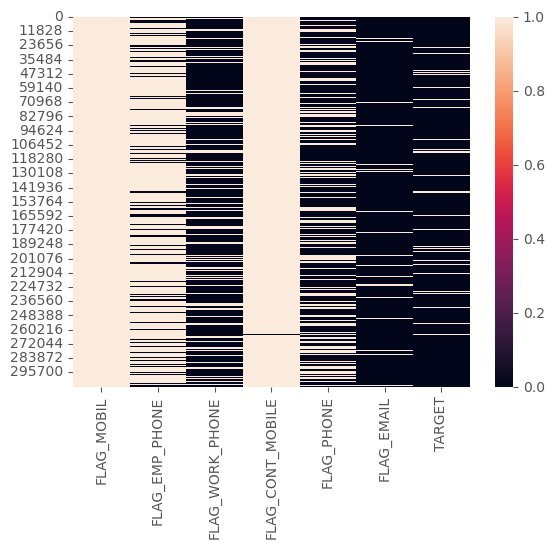

In [36]:
#We will ignore column DAYS_LAST_PHONE_CHANGE as it has no relation with target 
sns.heatmap(contact_df.drop('DAYS_LAST_PHONE_CHANGE', axis=1))

**Comment:**
- All the features in contact_df are categorical (0 and 1)

- As there is no similarity of patterns of TARGET value with the features,
we are assuming the feature are not useful for analysis.

- Hence all of the features can be removed

In [37]:
# Lets drop then..

print(application_data.shape)
unwanted_cols = contact_df.columns.to_list()
application_data.drop(labels=unwanted_cols[:-1], axis=1, inplace=True)
print(application_data.shape)

(307511, 50)
(307511, 43)


# 

### Segment 6: Asset Details

In [38]:
application_data[['FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'TARGET']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 3 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   FLAG_OWN_CAR     307511 non-null  object
 1   FLAG_OWN_REALTY  307511 non-null  object
 2   TARGET           307511 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 7.0+ MB


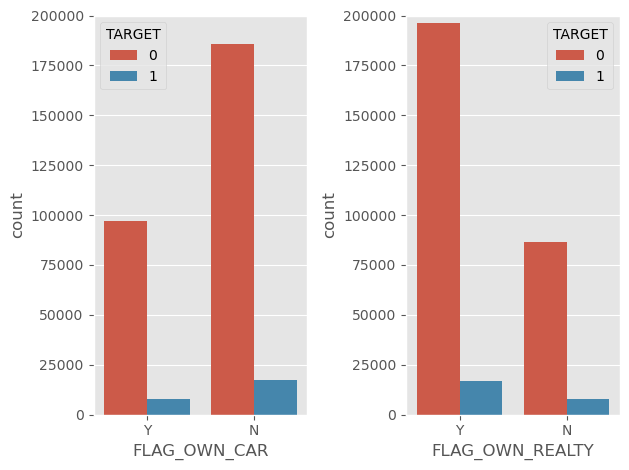

In [39]:
fig = plt.figure()

ax1 = fig.add_subplot(1, 2, 1, ylim=(0,200000))
ax2 = fig.add_subplot(1, 2, 2, ylim=(0,200000))

sns.countplot(data=application_data, x='FLAG_OWN_CAR', hue=application_data['TARGET'], order=['Y','N'], ax=ax1)
sns.countplot(data=application_data, x='FLAG_OWN_REALTY', hue=application_data['TARGET'], order=['Y','N'], ax=ax2)

plt.tight_layout()

plt.show()

In [40]:
value_wise_defaulter_percentage(application_data, 'FLAG_OWN_CAR')

,Value,Percentage of Defaulter
0,N,8.500227
1,Y,7.243730


In [41]:
value_wise_defaulter_percentage(application_data, 'FLAG_OWN_REALTY')

,Value,Percentage of Defaulter
1,N,8.324929
0,Y,7.961577


**Comment:**
- Most of the applicants own realty
- Most of the applicants do not own cars
- People not owning reality and car and have a slightly higher default rate than the people who own reality and car

# 

### Segment 7: Family Related Info

In [42]:
application_data[['CNT_CHILDREN', 'CNT_FAM_MEMBERS', 'NAME_FAMILY_STATUS']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 3 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   CNT_CHILDREN        307511 non-null  int64  
 1   CNT_FAM_MEMBERS     307509 non-null  float64
 2   NAME_FAMILY_STATUS  307511 non-null  object 
dtypes: float64(1), int64(1), object(1)
memory usage: 7.0+ MB


In [43]:
# dropping the rows(2) with null value in CNT_FAM_MEMBERS

application_data = application_data.dropna(subset=['CNT_FAM_MEMBERS']) 
application_data[['CNT_CHILDREN', 'CNT_FAM_MEMBERS', 'NAME_FAMILY_STATUS']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307509 entries, 0 to 307510
Data columns (total 3 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   CNT_CHILDREN        307509 non-null  int64  
 1   CNT_FAM_MEMBERS     307509 non-null  float64
 2   NAME_FAMILY_STATUS  307509 non-null  object 
dtypes: float64(1), int64(1), object(1)
memory usage: 9.4+ MB


In [44]:
# Since number of family member cannot have fraction, converting to Integer

application_data['CNT_FAM_MEMBERS'] = application_data['CNT_FAM_MEMBERS'].astype(int)
application_data[['CNT_FAM_MEMBERS']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307509 entries, 0 to 307510
Data columns (total 1 columns):
 #   Column           Non-Null Count   Dtype
---  ------           --------------   -----
 0   CNT_FAM_MEMBERS  307509 non-null  int32
dtypes: int32(1)
memory usage: 3.5 MB


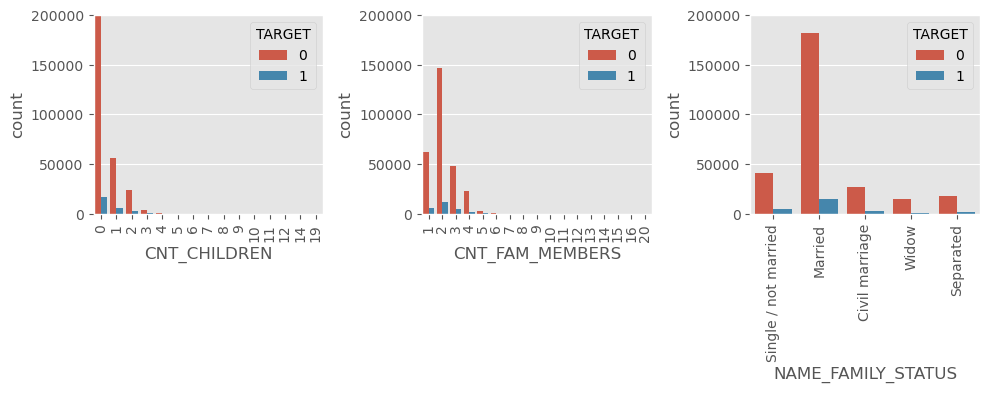

In [45]:
fig=plt.subplots(figsize=(10, 10))

for i, j in enumerate(['CNT_CHILDREN','CNT_FAM_MEMBERS', 'NAME_FAMILY_STATUS']):
    plt.subplot(3, 3, i+1, ylim=(0, 200000))
    plt.subplots_adjust(hspace = 1.0)
    sns.countplot(data=application_data, x=j, hue=application_data["TARGET"])
    plt.xticks(rotation=90)
    plt.tight_layout()


In [46]:
value_wise_defaulter_percentage(application_data, 'NAME_FAMILY_STATUS')

,Value,Percentage of Defaulter
2,Civil marriage,9.944584
0,Single / not married,9.807675
4,Separated,8.194234
1,Married,7.559868
3,Widow,5.824217


In [47]:
value_wise_defaulter_percentage(application_data, 'CNT_CHILDREN')

,Value,Percentage of Defaulter
9,9.0,100.000000
10,11.0,100.000000
7,6.0,28.571429
4,4.0,12.820513
3,3.0,9.631423
1,1.0,8.923575
2,2.0,8.721821
6,5.0,8.333333
0,0.0,7.711881
5,7.0,0.000000


In [48]:
application_data.CNT_CHILDREN.value_counts()

0     215369
1      61119
2      26749
3       3717
4        429
5         84
6         21
7          7
14         3
8          2
9          2
12         2
10         2
19         2
11         1
Name: CNT_CHILDREN, dtype: int64

In [49]:
value_wise_defaulter_percentage(application_data, 'CNT_FAM_MEMBERS')

,Value,Percentage of Defaulter
16,11.0,100.000000
10,13.0,100.000000
9,10.0,33.333333
8,8.0,30.000000
5,6.0,13.480392
4,5.0,9.401955
2,3.0,8.760290
3,4.0,8.648824
0,1.0,8.364408
1,2.0,7.583498


In [50]:
application_data.CNT_FAM_MEMBERS.value_counts()

2     158357
1      67847
3      52601
4      24697
5       3478
6        408
7         81
8         20
9          6
10         3
14         2
12         2
20         2
16         2
13         1
15         1
11         1
Name: CNT_FAM_MEMBERS, dtype: int64

**Comment:**
- Default rate is highest for Civil Marriage and Single applicants
- Most of the applicants are married (and/or) no children (and/or) 2 family members.
- Applicants with relatively more number of children (and/or) family members have higher default percentage.

- For some of the cases where count children/family members is high, and the default rate is very high or very low.
 This cases cannot be taken as a conclusion as number of applicants having a large family is very low.

# 

### Segment 8: Education and Occupation Info

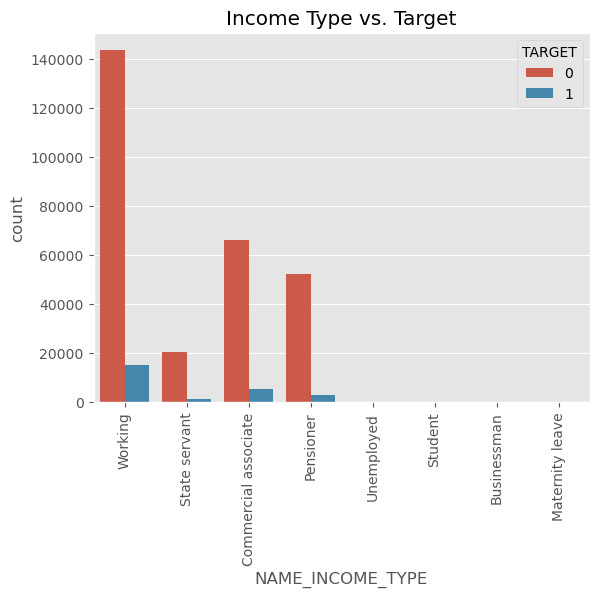

In [51]:
plt.figure()
sns.countplot(data=application_data, x='NAME_INCOME_TYPE', hue="TARGET")
plt.xticks(rotation=90)
plt.title("Income Type vs. Target")
plt.show()

In [48]:
value_wise_defaulter_percentage(application_data,'NAME_INCOME_TYPE')

,Value,Percentage of Defaulter
7,Maternity leave,40.000000
4,Unemployed,36.363636
0,Working,9.588472
2,Commercial associate,7.484466
1,State servant,5.754965
3,Pensioner,5.386366
5,Student,0.000000
6,Businessman,0.000000


In [52]:
application_data.NAME_INCOME_TYPE.value_counts()

Working                 158774
Commercial associate     71615
Pensioner                55362
State servant            21703
Unemployed                  22
Student                     18
Businessman                 10
Maternity leave              5
Name: NAME_INCOME_TYPE, dtype: int64

**Comment:**
- Most of the applicants are working.
- Applicants on Maternity Leave and Unemployed has highest percentage of Defaulter
- Businessman have lowest percentage of Defaulter
However applicants of income type('Unemployed', 'Student', 'Businessman', 'Maternity leave') are very few in the dataset to contribute in the analysis.

In [53]:
value_wise_defaulter_percentage(application_data,'NAME_EDUCATION_TYPE')

,Value,Percentage of Defaulter
3,Lower secondary,10.930537
0,Secondary / secondary special,8.939929
2,Incomplete higher,8.484966
1,Higher education,5.355187
4,Academic degree,1.829268


**Comment:**
- Applicants having "Lower secondary" education have highest percentage of Defaulter.

In [54]:
application_data['OCCUPATION_TYPE'].isnull().value_counts()

False    211118
True      96391
Name: OCCUPATION_TYPE, dtype: int64

In [55]:
application_data['OCCUPATION_TYPE'].value_counts()

Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21370
Drivers                  18603
High skill tech staff    11380
Accountants               9812
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64

In [56]:
# Imputing missing value for OCCUPATION TYPE as "Unknown"

application_data['OCCUPATION_TYPE'].fillna("Unknown", inplace=True)

In [57]:
value_wise_defaulter_percentage(application_data, 'OCCUPATION_TYPE')

,Value,Percentage of Defaulter
14,Low-skill Laborers,17.152413
5,Drivers,11.326130
13,Waiters/barmen staff,11.275964
11,Security staff,10.742449
0,Laborers,10.578770
8,Cooking staff,10.443996
6,Sales staff,9.631799
7,Cleaning staff,9.606705
15,Realty agents,7.856192
16,Secretaries,7.049808


**Comment:**
- Low skilled labourers have very high rate of defaulters in comparison to other occupations

# 

### Segment 9: Gender and age info

<AxesSubplot:xlabel='CODE_GENDER', ylabel='count'>

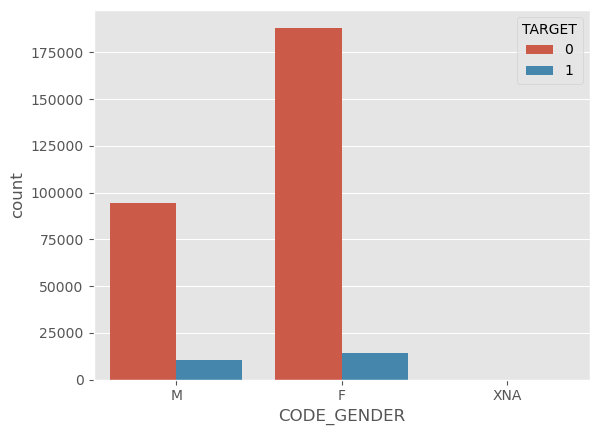

In [58]:
sns.countplot(data=application_data, x='CODE_GENDER', hue="TARGET")

**Comment:**
- Female applicants are more than male applicants
- Defaulter percentage is higher for male applicants

In [59]:
# Converting DAYS_BIRTH to age

application_data["Age"] = application_data.DAYS_BIRTH//(-365.25) 
application_data[["Age"]].describe()

,Age
count,307509.000000
mean,43.405198
std,11.945793
min,20.000000
25%,33.000000
50%,43.000000
75%,53.000000
max,69.000000


In [60]:
# Dropping the column as new column will be used for analysis

application_data.drop("DAYS_BIRTH", inplace=True, axis=1)

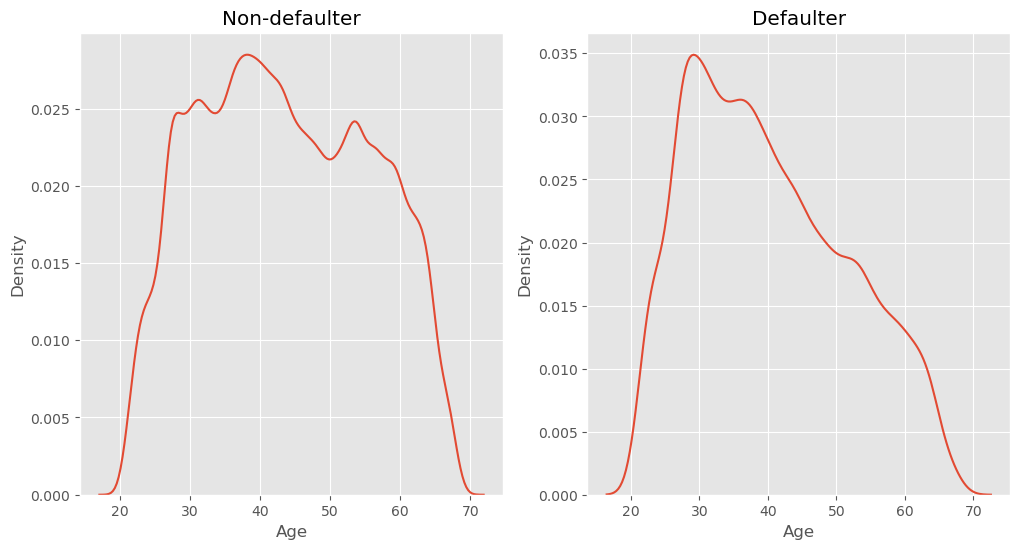

In [61]:
fig = plt.figure(figsize=(12,6))

ax1 = fig.add_subplot(1, 2, 1, title="Non-defaulter")
ax2 = fig.add_subplot(1, 2, 2, title="Defaulter")

sns.kdeplot(application_data[application_data["TARGET"] == 0]['Age'], ax=ax1)
sns.kdeplot(application_data[application_data["TARGET"] == 1]['Age'], ax=ax2)

plt.show()

**Comment:**
- People of age 30 have higher default rate
- Default cases are less for applicants more than 40 years old.

# 

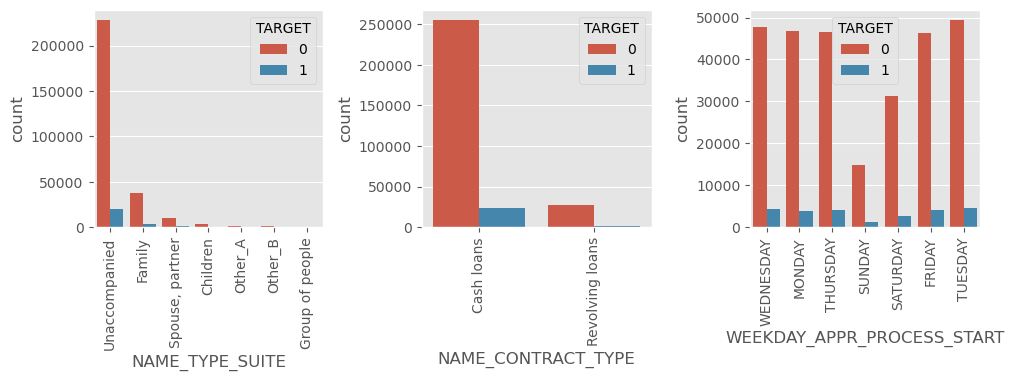

In [62]:
fig=plt.subplots(figsize=(10, 10))

for i, j in enumerate(['NAME_TYPE_SUITE', 'NAME_CONTRACT_TYPE', 'WEEKDAY_APPR_PROCESS_START']):
    plt.subplot(3, 3, i+1)
    plt.subplots_adjust(hspace = 1.0)
    sns.countplot(data=application_data, x=j, hue="TARGET")
    plt.xticks(rotation=90)
    plt.tight_layout()


**Comment:**
- Most of the applicants are unaccompanied while applying for loan
- Number Cash loans is quite higher than Revolving Loans
- All weekdays have similar number of applicants than weekend(Saturday and Sunday)

# 

### Income and Annuity

<AxesSubplot:>

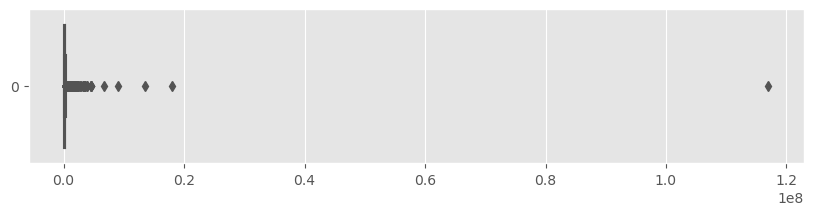

In [63]:
plt.figure(figsize=(10,2))
sns.boxplot(application_data['AMT_INCOME_TOTAL'],orient="h")

<AxesSubplot:>

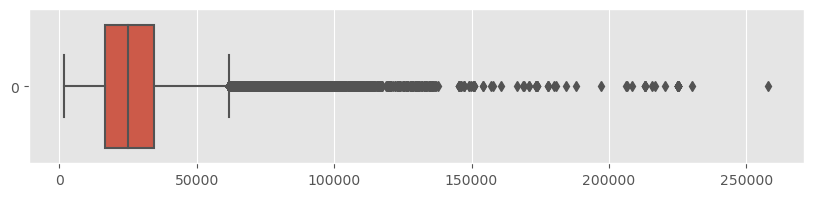

In [64]:
plt.figure(figsize=(10,2))
sns.boxplot(application_data['AMT_ANNUITY'],orient="h")

In [65]:
# Boxplot is showing the outliers for income and annuity, there are few entries having very large annuity and income than others.
# Considering this entries will mislead the average income of the entire population and further analysis.

# Excluding values outside 99 percentile for AMT_ANNUITY and AMT_INCOMRE_TOTAL

application_data = application_data[application_data['AMT_ANNUITY'] < np.nanpercentile(application_data['AMT_ANNUITY'], 99)]
application_data = application_data[application_data['AMT_INCOME_TOTAL'] < np.nanpercentile(application_data['AMT_INCOME_TOTAL'], 99)]

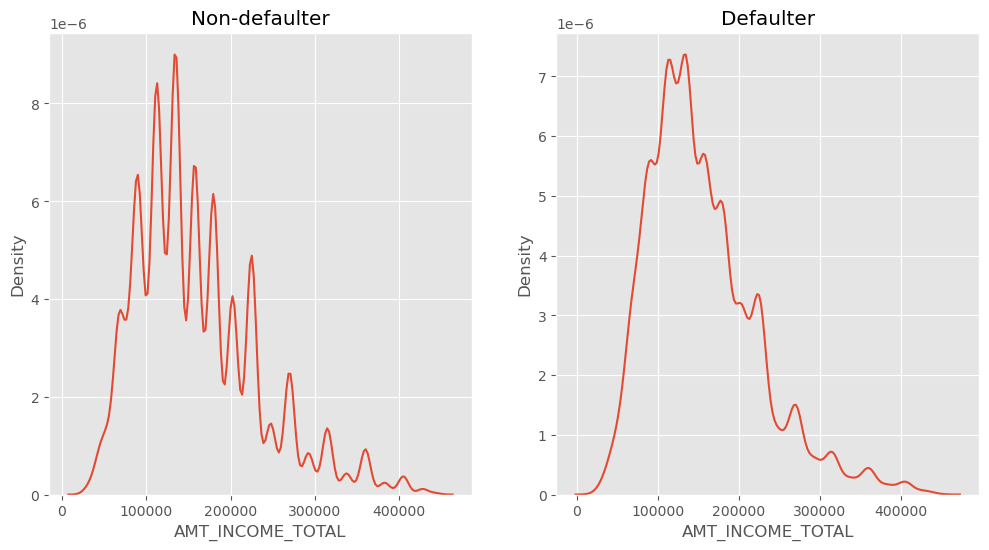

In [66]:
fig = plt.figure(figsize=(12,6))

ax1 = fig.add_subplot(1, 2, 1, title="Non-defaulter")
ax2 = fig.add_subplot(1, 2, 2, title="Defaulter")

sns.kdeplot(application_data[application_data["TARGET"] == 0]['AMT_INCOME_TOTAL'], ax=ax1)
sns.kdeplot(application_data[application_data["TARGET"] == 1]['AMT_INCOME_TOTAL'], ax=ax2)

plt.show()

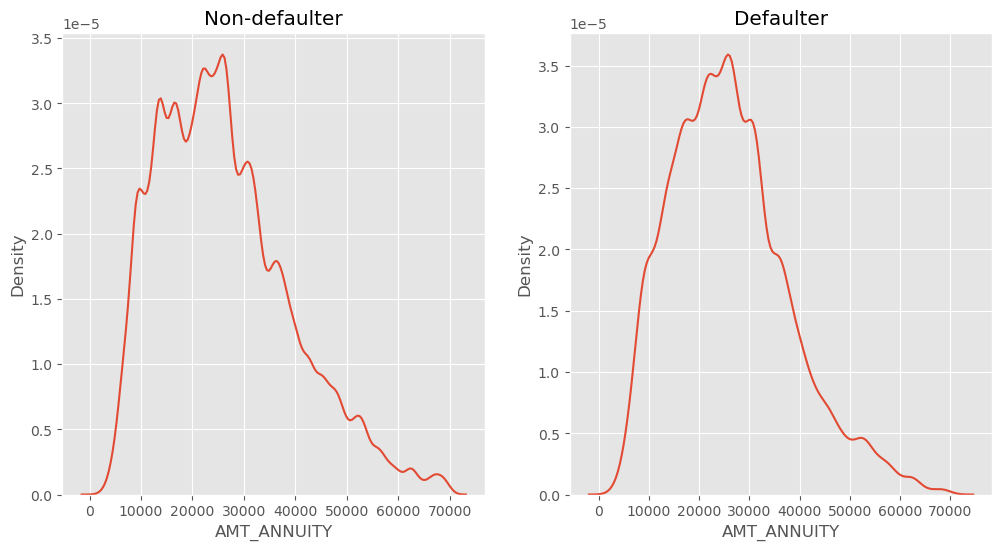

In [67]:
fig = plt.figure(figsize=(12,6))

ax1 = fig.add_subplot(1, 2, 1, title="Non-defaulter")
ax2 = fig.add_subplot(1, 2, 2, title="Defaulter")

sns.kdeplot(application_data[application_data["TARGET"] == 0]['AMT_ANNUITY'], ax=ax1)
sns.kdeplot(application_data[application_data["TARGET"] == 1]['AMT_ANNUITY'], ax=ax2)

plt.show()

**Comment:**
- For Defaulters and non-defaulters AMT_ANNUITY distribution is similar.

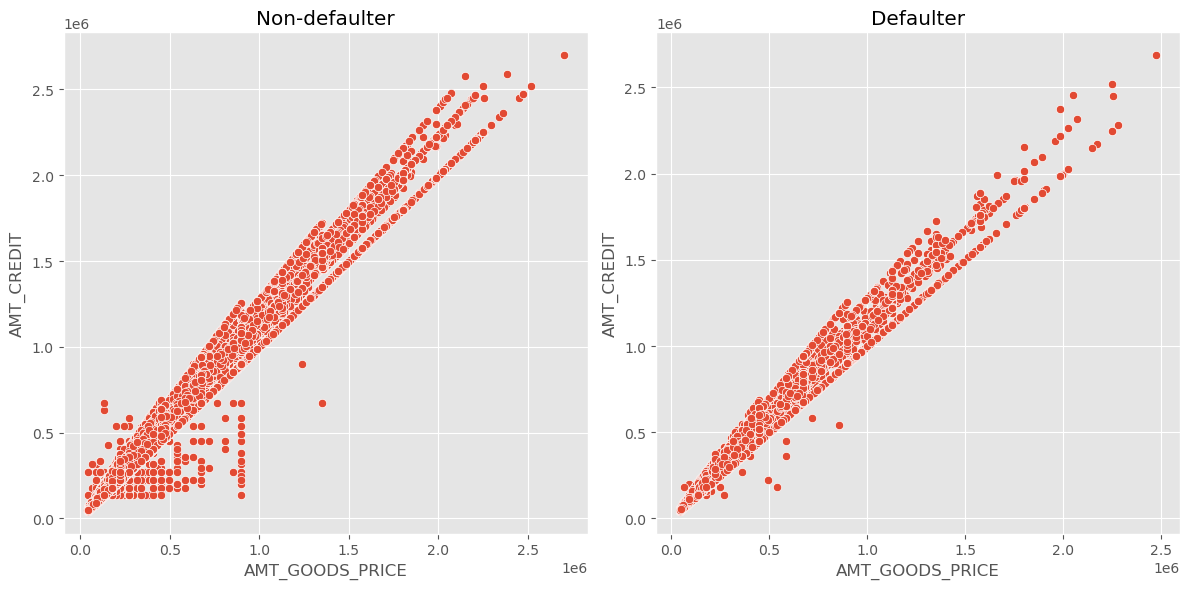

In [68]:
fig = plt.figure(figsize=(12,6))

ax1 = fig.add_subplot(1, 2, 1, title="Non-defaulter")
ax2 = fig.add_subplot(1, 2, 2, title="Defaulter")

sns.scatterplot(x=application_data[application_data["TARGET"] == 0]['AMT_GOODS_PRICE'], y=application_data[application_data["TARGET"] == 0]['AMT_CREDIT'], ax=ax1)
sns.scatterplot(x=application_data[application_data["TARGET"] == 1]['AMT_GOODS_PRICE'], y=application_data[application_data["TARGET"] == 1]['AMT_CREDIT'], ax=ax2)

plt.tight_layout()
plt.show()

**Comment:**
- AMT_CREDIT and AMT_GOODS_PRICE have linear relation.
- For lower range of AMT_CREDIT and AMT_GOODS_PRICE, amount of defaulters is less than that of non-defaulters 

# 

### External sources

In [70]:
application_data[['EXT_SOURCE_2','EXT_SOURCE_3']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 299463 entries, 0 to 307510
Data columns (total 2 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   EXT_SOURCE_2  298814 non-null  float64
 1   EXT_SOURCE_3  240038 non-null  float64
dtypes: float64(2)
memory usage: 6.9 MB


In [72]:
application_data[['EXT_SOURCE_2','EXT_SOURCE_3']].describe()

,EXT_SOURCE_2,EXT_SOURCE_3
count,2.988140e+05,240038.000000
mean,5.121097e-01,0.510843
std,1.912778e-01,0.194880
min,8.173617e-08,0.000527
25%,3.888098e-01,0.370650
50%,5.634807e-01,0.535276
75%,6.617584e-01,0.669057
max,8.549997e-01,0.896010


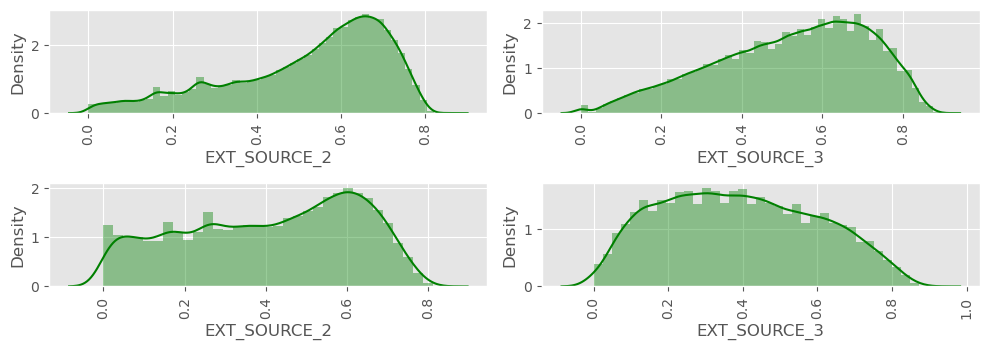

In [125]:
fig=plt.subplots(figsize=(10, 10))

for i, j in enumerate(['EXT_SOURCE_2', 'EXT_SOURCE_3', 'EXT_SOURCE_2', 'EXT_SOURCE_3']):
    if i < 2:
        target=0 # first row for non-defaulters
    else:
        target=1 # second row for defaulters
    plt.subplot(6, 2, i+1)
    plt.subplots_adjust(hspace = 1.0)
    sns.distplot(application_data[application_data["TARGET"] == target][j], color='green')
    plt.xticks(rotation=90)
    plt.tight_layout()

**Comment:**
- 'EXT_SOURCE_3' have very different distribution for defaulters and non-defaulters.
- 'EXT_SOURCE_2' has even ditribution for defaulters and non-defaulters.

# 

## Work on Combined Application Data (Current + Previous)

In [78]:
# Extracting the numeric features from previous application data

numeric_features = []
for col in previous_application.columns:
    if previous_application[col].dtype == float or previous_application[col].dtype == int:
        numeric_features.append(col)
        
print(numeric_features)

['AMT_ANNUITY', 'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE', 'RATE_DOWN_PAYMENT', 'CNT_PAYMENT', 'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL']


In [79]:
prev_num_df = pd.DataFrame()

for col in numeric_features:
    prev_num_df[col] = previous_application[col]
    
prev_num_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1669867 entries, 0 to 1670213
Data columns (total 13 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   AMT_ANNUITY                1297978 non-null  float64
 1   AMT_APPLICATION            1669867 non-null  float64
 2   AMT_CREDIT                 1669867 non-null  float64
 3   AMT_DOWN_PAYMENT           774370 non-null   float64
 4   AMT_GOODS_PRICE            1284699 non-null  float64
 5   RATE_DOWN_PAYMENT          774370 non-null   float64
 6   CNT_PAYMENT                1297983 non-null  float64
 7   DAYS_FIRST_DRAWING         997149 non-null   float64
 8   DAYS_FIRST_DUE             997149 non-null   float64
 9   DAYS_LAST_DUE_1ST_VERSION  997149 non-null   float64
 10  DAYS_LAST_DUE              997149 non-null   float64
 11  DAYS_TERMINATION           997149 non-null   float64
 12  NFLAG_INSURED_ON_APPROVAL  997149 non-null   float64
dtypes: float64(1

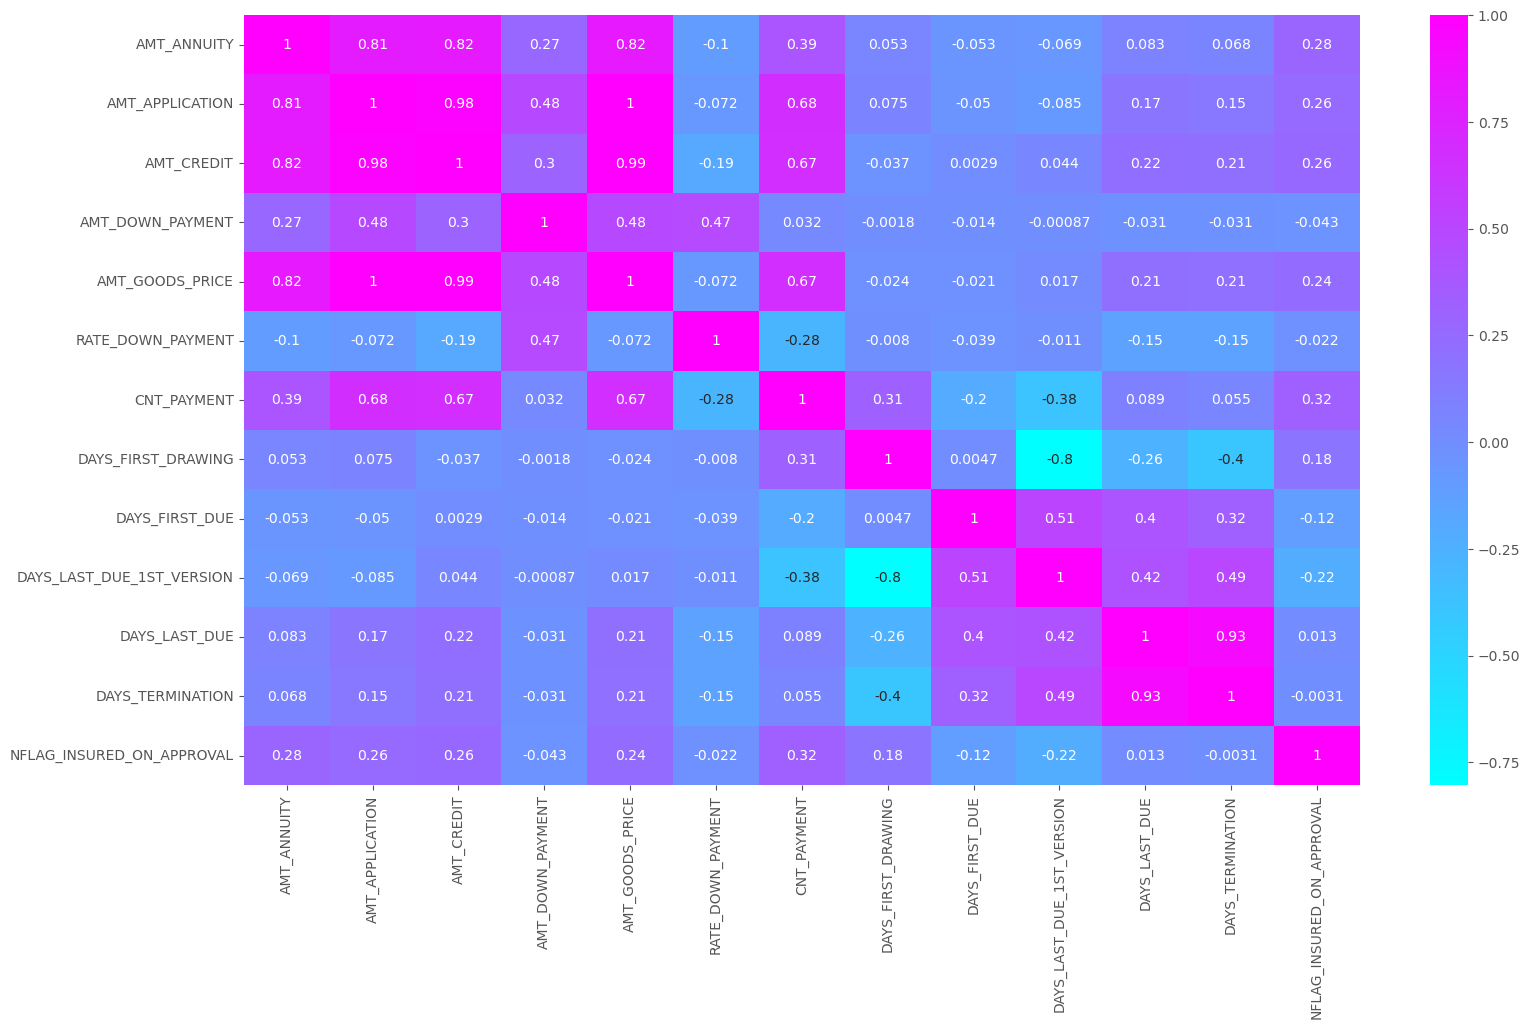

In [123]:
# Checking correlation between numeric features of previous application data

plt.figure(figsize=(18,10))
sns.heatmap(prev_num_df.corr(),cmap='cool', annot=True)
plt.show()

**Comment:**

- 'DAYS_LAST_DUE' and 'DAYS_TERMINATION' are highly correlated
- 'DAYS_FIRST_DRAWING' and 'DAYS_LAST_DUE_1st_VERSION' have high negative correlation
- 'AMT_ANNUITY','AMT_APPLICATION','AMT_CREDIT','AMT_GOODS_PRICE' are highly correlated

The features can be removed before modelling this data, as they would cause collinearity **'DAYS_TERMINATION','DAYS_LAST_DUE_1st_VERSION','AMT_APPLICATION','AMT_CREDIT','AMT_GOODS_PRICE'**
For EDA purpose we are not removing them.

- 'SK_ID_PREV' column is not required for analysis.

In [82]:
previous_application.drop(['SK_ID_PREV'], axis=1, inplace=True)

In [83]:
print(previous_application['NAME_TYPE_SUITE'].value_counts())

Unaccompanied      508970
Family             213263
Spouse, partner     67069
Children            31566
Other_B             17624
Other_A              9077
Group of people      2240
Name: NAME_TYPE_SUITE, dtype: int64


In [84]:
# Filling missing value as 'Unaccompanied' is most common value

previous_application['NAME_TYPE_SUITE'].fillna(previous_application.NAME_TYPE_SUITE.mode()[0], inplace=True)

In [85]:
# Merging only required columns of application_data with previous_application_data

prev_ap_merged = pd.merge(application_data[['SK_ID_CURR', 'TARGET']], previous_application, how='left', on=['SK_ID_CURR'])

prev_ap_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1395187 entries, 0 to 1395186
Data columns (total 35 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_CURR                   1395187 non-null  int64  
 1   TARGET                       1395187 non-null  int64  
 2   NAME_CONTRACT_TYPE           1379999 non-null  object 
 3   AMT_ANNUITY                  1080303 non-null  float64
 4   AMT_APPLICATION              1379999 non-null  float64
 5   AMT_CREDIT                   1379999 non-null  float64
 6   AMT_DOWN_PAYMENT             649053 non-null   float64
 7   AMT_GOODS_PRICE              1068463 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1379999 non-null  object 
 9   HOUR_APPR_PROCESS_START      1379999 non-null  float64
 10  FLAG_LAST_APPL_PER_CONTRACT  1379999 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1379999 non-null  float64
 12  RATE_DOWN_PAYMENT            649053 non-nu

In [86]:
# Checking on the numeric data

prev_ap_merged.describe()

,SK_ID_CURR,TARGET,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.395187e+06,1.395187e+06,1.080303e+06,1.379999e+06,1.379999e+06,6.490530e+05,1.068463e+06,1.379999e+06,1.379999e+06,649053.000000,1.379999e+06,1.379999e+06,1.080308e+06,833082.000000,833082.000000,833082.000000,833082.000000,833082.000000,833082.000000
mean,2.784658e+05,8.676256e-02,1.553712e+04,1.719696e+05,1.929638e+05,6.499479e+03,2.221433e+05,1.246162e+01,9.964362e-01,0.079866,-8.797335e+02,3.145597e+02,1.605233e+01,342262.411501,13500.321022,33269.870175,76987.021667,82662.759182,0.330717
std,1.028140e+05,2.814869e-01,1.413975e+04,2.865601e+05,3.124851e+05,1.971680e+04,3.081173e+05,3.324187e+00,5.959088e-02,0.107511,7.836826e+02,7.785949e+03,1.456095e+01,88823.450082,71676.202913,106153.761415,149930.952579,153738.206450,0.470471
min,1.000020e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-9.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-0.000015,-2.922000e+03,-1.000000e+00,0.000000e+00,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000
25%,1.893020e+05,0.000000e+00,6.198885e+03,1.975050e+04,2.474550e+04,0.000000e+00,4.945500e+04,1.000000e+01,1.000000e+00,0.000000,-1.313000e+03,-1.000000e+00,6.000000e+00,365243.000000,-1630.000000,-1245.000000,-1316.000000,-1269.000000,0.000000
50%,2.790110e+05,0.000000e+00,1.108795e+04,6.988500e+04,7.955550e+04,1.750500e+03,1.082115e+05,1.200000e+01,1.000000e+00,0.061953,-5.810000e+02,4.000000e+00,1.200000e+01,365243.000000,-824.000000,-357.000000,-533.000000,-493.000000,0.000000
75%,3.674870e+05,0.000000e+00,2.016693e+04,1.800000e+05,2.097000e+05,7.605000e+03,2.295000e+05,1.500000e+01,1.000000e+00,0.108909,-2.700000e+02,8.500000e+01,2.400000e+01,365243.000000,-406.000000,136.000000,-72.000000,-40.000000,1.000000
max,4.562550e+05,1.000000e+00,4.180581e+05,4.455000e+06,4.104351e+06,3.060045e+06,4.455000e+06,2.300000e+01,1.000000e+00,1.000000,-1.000000e+00,4.000000e+06,8.400000e+01,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


### Handling Outliers of merged dataset

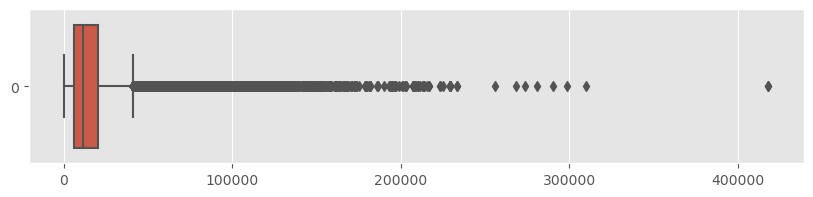

In [89]:
plt.figure(figsize=(10,2))
sns.boxplot(prev_ap_merged['AMT_ANNUITY'],orient="h")
plt.show()

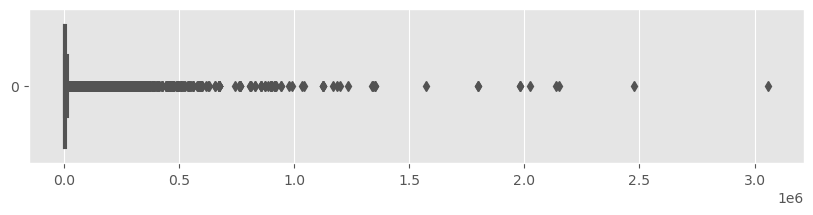

In [90]:
plt.figure(figsize=(10,2))
sns.boxplot(prev_ap_merged['AMT_DOWN_PAYMENT'],orient="h")
plt.show()

In [91]:
# Excluding values outside 99 percentile for AMT_ANNUITY and AMT_DOWN_PAYMENT

prev_ap_merged = prev_ap_merged[prev_ap_merged['AMT_ANNUITY'] < np.nanpercentile(prev_ap_merged['AMT_ANNUITY'], 99)]
prev_ap_merged = prev_ap_merged[prev_ap_merged['AMT_DOWN_PAYMENT'] < np.nanpercentile(prev_ap_merged['AMT_DOWN_PAYMENT'], 99)]

Checking the features after updating.

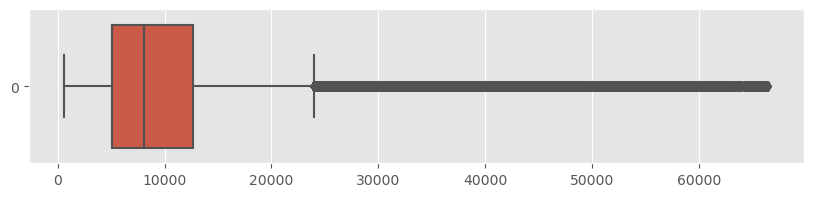

In [92]:
plt.figure(figsize=(10,2))
sns.boxplot(prev_ap_merged['AMT_ANNUITY'],orient="h")
plt.show()

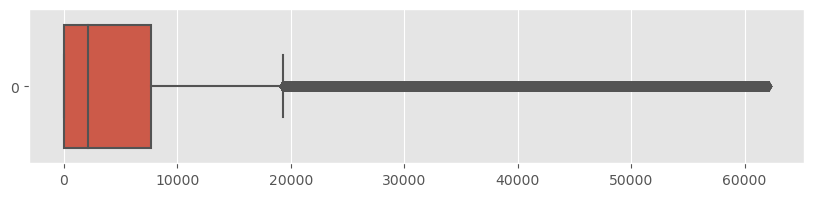

In [93]:
plt.figure(figsize=(10,2))
sns.boxplot(prev_ap_merged['AMT_DOWN_PAYMENT'],orient="h")
plt.show()

### Checking Data Imbalance in Previous Application Data

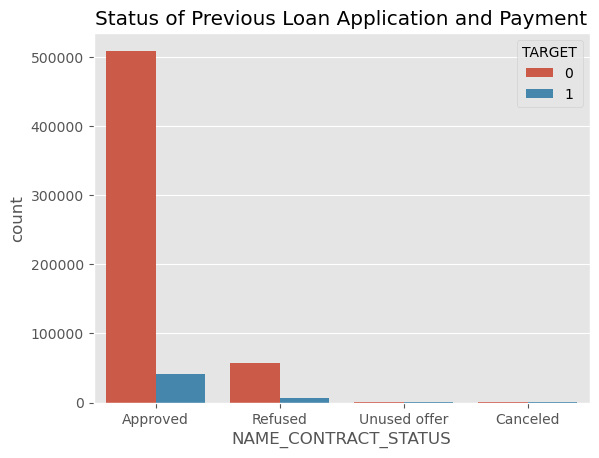

In [95]:
plt.style.use("ggplot")
plt.title("Status of Previous Loan Application and Payment")
sns.countplot(data=prev_ap_merged, x='NAME_CONTRACT_STATUS', hue='TARGET')
plt.show()

In [96]:
# Percentage of previously approved loan applicants that defaulted in current loan

total_approved = prev_ap_merged[prev_ap_merged['NAME_CONTRACT_STATUS'] == "Approved"].shape[0]
default_approved = prev_ap_merged[(prev_ap_merged['TARGET'] == 1) & (prev_ap_merged['NAME_CONTRACT_STATUS'] == "Approved")].shape[0]

print("Percentage of previously approved loan applicants that defaulted in current loan : ", (default_approved*100/total_approved))

Percentage of previously approved loan applicants that defaulted in current loan :  7.394371961301095


In [97]:
# Percentage of previously refused loan applicants that were able to pay current loan

total_refused = prev_ap_merged[prev_ap_merged['NAME_CONTRACT_STATUS'] == "Refused"].shape[0]
nondefault_refused = prev_ap_merged[(prev_ap_merged['TARGET'] == 0) & (prev_ap_merged['NAME_CONTRACT_STATUS'] == "Refused")].shape[0]

print("Percentage of previously refused loan applicants that were able to pay current loan : ", (nondefault_refused*100/total_refused))

Percentage of previously refused loan applicants that were able to pay current loan :  90.11543096340458


**Observation:**

- The applicants whose previous loans were approved are more likely to pay current loan in time, than the applicants whose previous loans were rejected.

- 7% of the previously approved loan applicants that defaulted in current loan

- 90 % of the previously refused loan applicants that were able to pay current loan 

## Analysis of Numeric Features of Previous Application Data

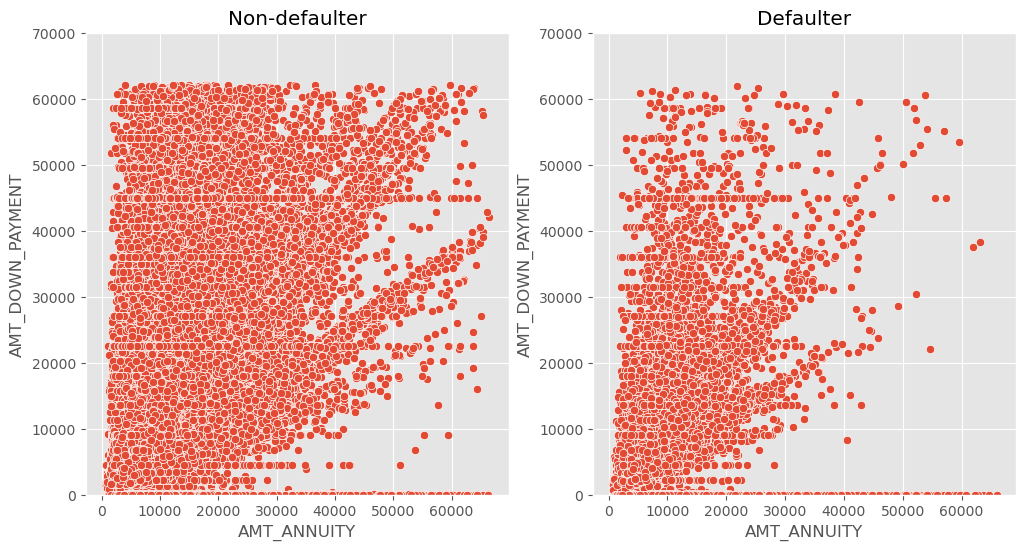

In [99]:
# Setting equal y-limit for both sub-plots for better comparison

fig = plt.figure(figsize=(12,6))

ax1 = fig.add_subplot(1, 2, 1, ylim=(0,70000), title="Non-defaulter")
ax2 = fig.add_subplot(1, 2, 2, ylim=(0,70000), title="Defaulter")

sns.scatterplot(x=prev_ap_merged[prev_ap_merged["TARGET"] == 0]['AMT_ANNUITY'], y=prev_ap_merged[prev_ap_merged["TARGET"] == 0]['AMT_DOWN_PAYMENT'], ax=ax1)
sns.scatterplot(x=prev_ap_merged[prev_ap_merged["TARGET"] == 1]['AMT_ANNUITY'], y=prev_ap_merged[prev_ap_merged["TARGET"] == 1]['AMT_DOWN_PAYMENT'], ax=ax2)

plt.show()

**Comment:**
- Number of defaulters are less for larger amount of annuity of previous application.
- For higher down payment, defaulter cases are less.

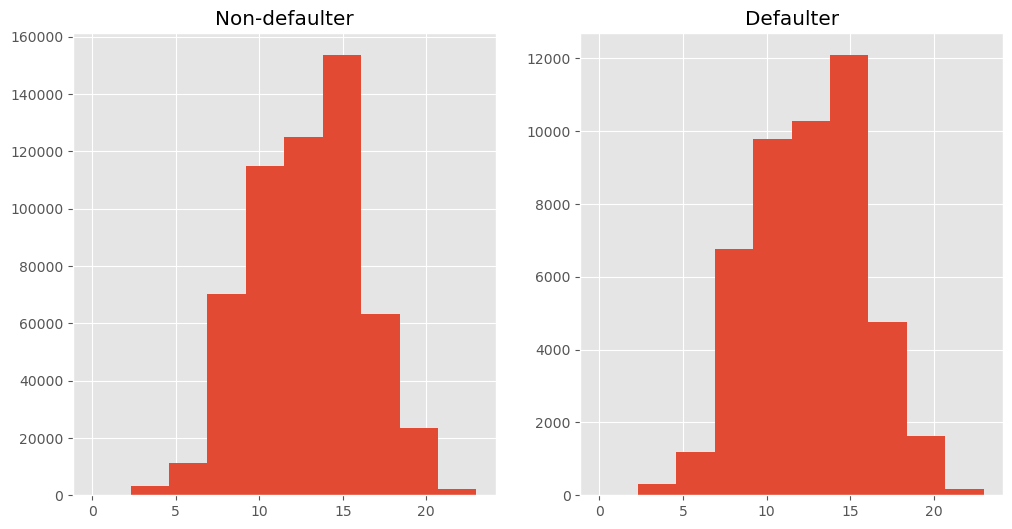

In [100]:
fig = plt.figure(figsize=(12,6))

ax1 = fig.add_subplot(1, 2, 1, title="Non-defaulter")
ax2 = fig.add_subplot(1, 2, 2, title="Defaulter")

prev_ap_merged[prev_ap_merged["TARGET"] == 0]["HOUR_APPR_PROCESS_START"].hist(bins=10, ax=ax1)
prev_ap_merged[prev_ap_merged["TARGET"] == 1]["HOUR_APPR_PROCESS_START"].hist(bins=10, ax=ax2)

plt.show()

**Comment:**
- Most of the loans are applied around 15:00 hours. This feature is doesn't seem to have visible impact on TARGET variable

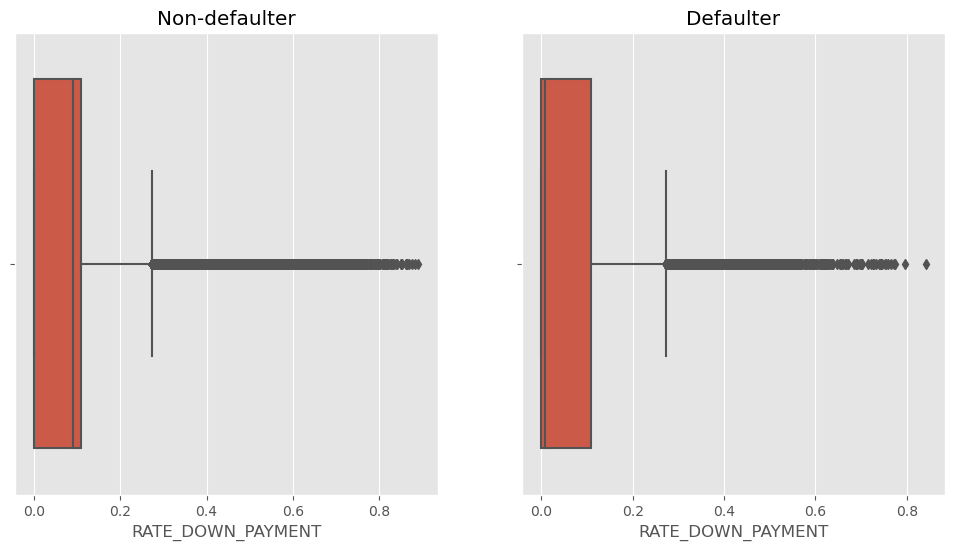

In [103]:
fig = plt.figure(figsize=(12,6))

ax1 = fig.add_subplot(1, 2, 1, title="Non-defaulter")
ax2 = fig.add_subplot(1, 2, 2, title="Defaulter")

sns.boxplot(data=prev_ap_merged[prev_ap_merged["TARGET"] == 0], x='RATE_DOWN_PAYMENT', ax=ax1)
sns.boxplot(data=prev_ap_merged[prev_ap_merged["TARGET"] == 1], x='RATE_DOWN_PAYMENT', ax=ax2)

plt.show()

In [104]:
# Percentile of RATE_DOWN_PAYMENT for non-defaulters

prev_ap_merged[prev_ap_merged["TARGET"] == 0]['RATE_DOWN_PAYMENT'].quantile([0.5, 0.7, 0.9, 0.95, 0.99])

0.50    0.090552
0.70    0.108909
0.90    0.211858
0.95    0.280102
0.99    0.495188
Name: RATE_DOWN_PAYMENT, dtype: float64

In [105]:
# Percentile of RATE_DOWN_PAYMENT for defaulters

prev_ap_merged[prev_ap_merged["TARGET"] == 1]['RATE_DOWN_PAYMENT'].quantile([0.5, 0.7, 0.9, 0.95, 0.99])

0.50    0.007104
0.70    0.104258
0.90    0.198923
0.95    0.230414
0.99    0.448499
Name: RATE_DOWN_PAYMENT, dtype: float64

**Comment:**
- For those who had lower rate of down payment in previous application, cases of default are higher.

### Analysis of Categorical Features of Previous Application Data

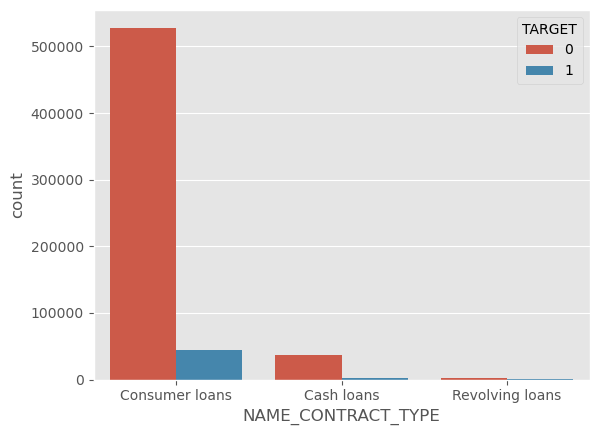

In [108]:
sns.countplot(data=prev_ap_merged, x='NAME_CONTRACT_TYPE', hue=prev_ap_merged.TARGET)
plt.show()

**Comments:**
- Highest number of loans are applied for Consumer Loans

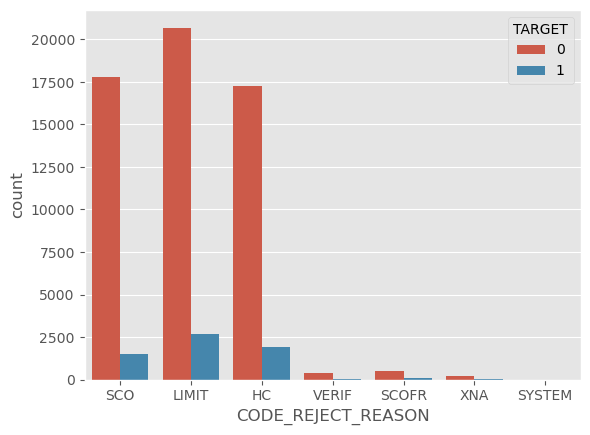

In [109]:
sns.countplot(data=prev_ap_merged[prev_ap_merged['NAME_CONTRACT_STATUS'] == "Refused"], x="CODE_REJECT_REASON", hue=prev_ap_merged.TARGET)
plt.show()

**Comment:**
- As seen in the above plot, 'SCO', 'LIMIT' and 'HC' are the most common reason of rejection. 

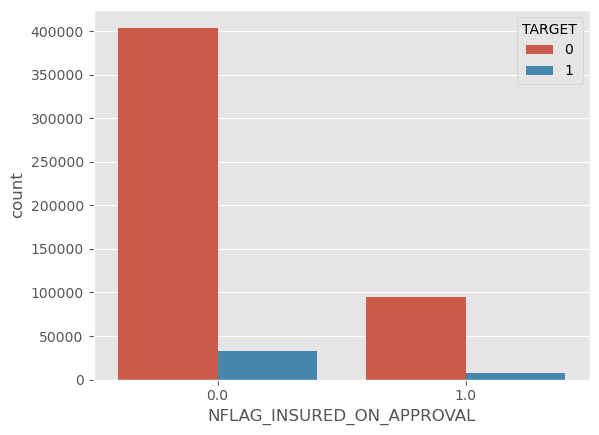

In [111]:
sns.countplot(data=prev_ap_merged, x='NFLAG_INSURED_ON_APPROVAL', hue=prev_ap_merged['TARGET'])
plt.show()

**Comment**
- Most of the people did not request insurance during previous loan application.

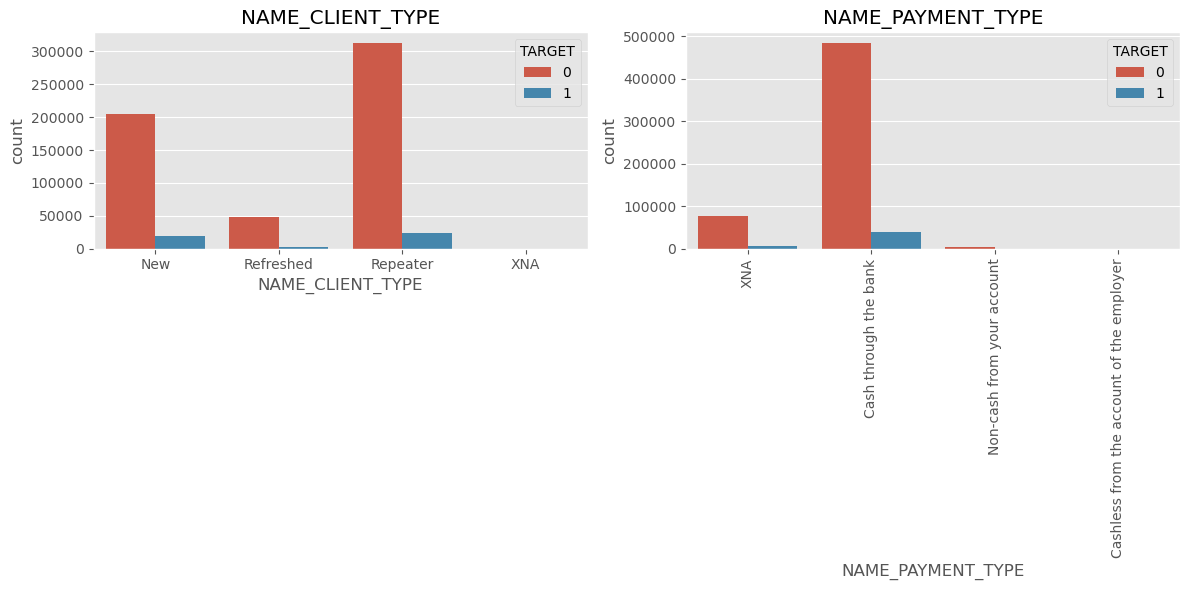

In [112]:
fig = plt.figure(figsize=(12,6))

ax1 = fig.add_subplot(1, 2, 1, title="NAME_CLIENT_TYPE")
ax2 = fig.add_subplot(1, 2, 2, title="NAME_PAYMENT_TYPE")

sns.countplot(data=prev_ap_merged, x='NAME_CLIENT_TYPE', hue=prev_ap_merged['TARGET'], ax=ax1)
sns.countplot(data=prev_ap_merged, x='NAME_PAYMENT_TYPE', hue=prev_ap_merged['TARGET'], ax=ax2)
plt.xticks(rotation=90)

plt.tight_layout()

plt.show()

**Comment:**
- Most of the applicants are repeater.
- 'Cash through the bank' is the most frequently used payment method

In [113]:
value_wise_defaulter_percentage(prev_ap_merged, 'NAME_GOODS_CATEGORY')

,Value,Percentage of Defaulter
23,Insurance,10.526316
0,Vehicles,10.246227
17,Auto Accessories,9.162935
14,Jewelry,9.103613
3,Mobile,8.651399
20,Weapon,8.196721
15,Office Appliances,8.189880
8,Computers,8.132949
21,Direct Sales,7.812500
5,Audio/Video,7.734280


**Comment:**
Highest percentage of default cases are for the applicants who previously applied for Insurance and Vehicles

In [114]:
value_wise_defaulter_percentage(prev_ap_merged, 'NAME_PORTFOLIO')

,Value,Percentage of Defaulter
2,Cards,17.214700
0,POS,7.707610
1,Cash,6.410974
3,Cars,0.000000


**Comment:** 
For Cards defaulter rate is highest. 

In [116]:
value_wise_defaulter_percentage(prev_ap_merged, 'NAME_PRODUCT_TYPE')

,Value,Percentage of Defaulter
1,walk-in,9.305748
0,XNA,7.707489
2,x-sell,6.038647


**Comment:**
From all the walk-in applicants 9% defaulted in current loan.

In [118]:
value_wise_defaulter_percentage(prev_ap_merged, 'CHANNEL_TYPE')

,Value,Percentage of Defaulter
4,AP+ (Cash loan),13.559322
1,Country-wide,7.960713
2,Regional / Local,7.601718
0,Stone,7.311507
3,Credit and cash offices,6.162610
5,Contact center,4.761905
6,Car dealer,0.000000


**Comment:**
15% loan applicatiant defaulted for AP+ (Cash Loan)

In [119]:
value_wise_defaulter_percentage(prev_ap_merged, 'NAME_SELLER_INDUSTRY')

,Value,Percentage of Defaulter
0,Auto technology,10.700602
9,Jewelry,9.036743
3,Connectivity,8.817762
2,Consumer electronics,7.493599
7,Industry,7.236623
4,Construction,6.613176
5,XNA,6.265718
1,Furniture,5.946378
6,Clothing,5.931870
8,Tourism,4.659498


**Comment:**
- In seller Industry "Auto technology" has highest rate of defaulter
- MLM partners has lowest number of defaulters

In [120]:
value_wise_defaulter_percentage(prev_ap_merged, 'NAME_YIELD_GROUP')

,Value,Percentage of Defaulter
4,XNA,17.214700
2,high,8.376345
1,middle,7.593279
0,low_normal,6.888969
3,low_action,6.663393


**Comment:**
Defaulter percentage is highest where NAME_YIELD_GROUP is not known.

In [121]:
value_wise_defaulter_percentage(prev_ap_merged, 'PRODUCT_COMBINATION')

,Value,Percentage of Defaulter
13,Card Street,17.291768
4,POS mobile with interest,8.799451
0,POS other with interest,7.983494
3,POS mobile without interest,7.907820
2,POS household with interest,7.789692
11,POS others without interest,7.286064
5,POS household without interest,6.704586
15,Card X-Sell,6.666667
9,Cash Street: middle,6.548673
10,Cash Street: high,6.431234


**Comment:** Highest percentage of default cases is for Card Street

# 

### Top 10 correlation for Defaulters

In [74]:
defaulter_corr = default.corr()
round(defaulter_corr, 2)

corr_list = defaulter_corr.unstack()

In [75]:
# Listing the correlations in pair sorted in descending order
corr_list.sort_values(ascending=False).drop_duplicates().head(10)

SK_ID_CURR                   SK_ID_CURR                    1.000000
OBS_30_CNT_SOCIAL_CIRCLE     OBS_60_CNT_SOCIAL_CIRCLE      0.998269
AMT_GOODS_PRICE              AMT_CREDIT                    0.983103
REGION_RATING_CLIENT_W_CITY  REGION_RATING_CLIENT          0.956637
CNT_CHILDREN                 CNT_FAM_MEMBERS               0.885484
DEF_30_CNT_SOCIAL_CIRCLE     DEF_60_CNT_SOCIAL_CIRCLE      0.868994
LIVE_REGION_NOT_WORK_REGION  REG_REGION_NOT_WORK_REGION    0.847885
REG_CITY_NOT_WORK_CITY       LIVE_CITY_NOT_WORK_CITY       0.778540
AMT_ANNUITY                  AMT_GOODS_PRICE               0.752699
AMT_CREDIT                   AMT_ANNUITY                   0.752195
dtype: float64

### Top 10 Correlation for Non-defaulters

In [76]:
nondefaulter_corr = non_default.corr()
round(nondefaulter_corr, 2)

nondf_corr_list = nondefaulter_corr.unstack()

In [77]:
# Listing the correlations in pair sorted in descending order
nondf_corr_list.sort_values(ascending=False).drop_duplicates().head(10)

SK_ID_CURR                   SK_ID_CURR                    1.000000
OBS_60_CNT_SOCIAL_CIRCLE     OBS_30_CNT_SOCIAL_CIRCLE      0.998508
AMT_GOODS_PRICE              AMT_CREDIT                    0.987250
REGION_RATING_CLIENT_W_CITY  REGION_RATING_CLIENT          0.950149
CNT_FAM_MEMBERS              CNT_CHILDREN                  0.878571
LIVE_REGION_NOT_WORK_REGION  REG_REGION_NOT_WORK_REGION    0.861861
DEF_30_CNT_SOCIAL_CIRCLE     DEF_60_CNT_SOCIAL_CIRCLE      0.859332
LIVE_CITY_NOT_WORK_CITY      REG_CITY_NOT_WORK_CITY        0.830381
AMT_GOODS_PRICE              AMT_ANNUITY                   0.776686
AMT_ANNUITY                  AMT_CREDIT                    0.771309
dtype: float64

#### Top 10 Correlations for Defaulters

1. (OBS_60_CNT_SOCIAL_CIRCLE, OBS_30_CNT_SOCIAL_CIRCLE)
2. (BASEMENTAREA_AVG, BASEMENTAREA_MEDI)
3. (YEARS_BUILD_AVG, YEARS_BUILD_MEDI)
4. (COMMONAREA_MEDI, COMMONAREA_AVG)
5. (FLOORSMIN_AVG, FLOORSMIN_MEDI)
6. (NONLIVINGAPARTMENTS_MEDI, NONLIVINGAPARTMENTS_AVG)
7. (LIVINGAPARTMENTS_MEDI, LIVINGAPARTMENTS_AVG)
8. (NONLIVINGAPARTMENTS_MEDI, NONLIVINGAPARTMENTS_MODE)
9. (FLOORSMAX_AVG, FLOORSMAX_MEDI)
10. (ENTRANCES_AVG, ENTRANCES_MEDI)

#### Top 10 Correlations for Non-Defaulters

1. (YEARS_BUILD_AVG, YEARS_BUILD_MEDI)
2. (OBS_30_CNT_SOCIAL_CIRCLE, OBS_60_CNT_SOCIAL_CIRCLE)
3. (FLOORSMIN_AVG, FLOORSMIN_MEDI)
4. (FLOORSMAX_AVG, FLOORSMAX_MEDI)
5. (ENTRANCES_AVG, ENTRANCES_MEDI)
6. (ELEVATORS_AVG, ELEVATORS_MEDI)
7. (COMMONAREA_MEDI, COMMONAREA_AVG)
8. (LIVINGAREA_AVG, LIVINGAREA_MEDI)
9. (APARTMENTS_MEDI, APARTMENTS_AVG)
10. (BASEMENTAREA_AVG, BASEMENTAREA_MEDI)

### Top 5 important columns

-Family Info: (Important driving features : **'CNT_FAM_MEMBERS', 'CNT_CHILDREN'**)
i. Most of the applicants are married (and/or) no children (and/or) 2 family members.
ii. Applicants with relatively more number of children (and/or) family members have higher default percentage.
(For some of the cases where count children/family members is high, and the default rate is very high or very low.
This cases cannot be considered for analysis as number of applicants having a large family is very low.)

- Education and Occupation Info: (Important driving features :**'NAME_INCOME_TYPE', 'OCCUPATION_TYPE'**)
- Most of the applicants are working.
- Applicants on Maternity Leave and Unemployed has highest percentage of Defaulter
- Businessman have lowest (0) percentage of Defaulter
However applicants of income type('Unemployed', 'Student', 'Businessman', 'Maternity leave') are very few in the dataset to contribute in the analysis.

**CODE_GENDER**
- Female applicants are more than male applicants
- Defauter percentage is higher for male applicants
- XNA values can be replaced with "Unknown"

**DAYS_BIRTH**
- A derived column 'Age' from this gave useful information.
- People of age 25-35 have higher default rate
- Default cases are less for applicants more than 40 years old.

**'EXT_SOURCE_3'** have very different distribution for defaulters and non-defaulters. This can be important features.

# 

## Summary :

1. This data is highly imbalanced as number of defaulter is very less in total population.

2. Documents : Considered features 'FLAG_DOCUMENT_2','FLAG_DOCUMENT_3',...,'FLAG_DOCUMENT_21' for this segment. 
   Majority of the applicants did not submit any documents apart from DOCUMENT_3.
   FLAG_DOCUMENT_3 has similar impact on defaulters and non-defaulters. Hence these columns can be dropped.

3. Housing: All of the features considered have very high (47-70%) missing data percentage. Hence all these features can be dropped. Plot of 'NAME_HOUSING_TYPE' vs 'TARGET' shows that:
    - Most of the applicants live in House/Apartment
    - Applicants living with their parents or in rented apartment have higher rate of default. 


4. Social Circle Info: The features show similar trend for defaulters and nondefalters, can be dropped.

5. Contact Info : Considered 'FLAG_MOBIL','FLAG_EMP_PHONE' etc for this segment. No impact on Target, features can be dropped.

6. Asset Info : 
    - Most of the applicants own realty
    - Most of the applicants do not own cars
    - People not owning reality and car and have a slightly higher default rate than the people who own reality and car

7. There are feature columns in the dataset that are highly correlated to each other. Which means both will have similar impact on the target value. Those features can be removed before feeding this data to a model to avoid collinearity.

8. Feature columns with 40% or more missing data can be dropped.

9. Following columns should be converted to integer.

 * DAYS_FIRST_DRAWING &nbsp;&nbsp;&nbsp;  float64
 * DAYS_FIRST_DUE   &nbsp;&nbsp;&nbsp;    float64
 * DAYS_LAST_DUE_1ST_VERSION &nbsp;&nbsp;&nbsp; float64
 * DAYS_LAST_DUE      &nbsp;&nbsp;&nbsp;        float64
 * DAYS_TERMINATION   &nbsp;&nbsp;&nbsp;   float64
 * NFLAG_INSURED_ON_APPROVAL  &nbsp;&nbsp;&nbsp;  float64

# 

## Conclusion :
1. Applicants living with their parents or in rented apartment have higher rate of default.
2. Banks should focus on 'Students' ,'Pensioner' for successful repayments.
3. Banks should focus less on income type ‘Working’ as they are having most number of unsuccessful payments.
4. Loan Purpose on 'Repair' having highest number of unsuccessful repayments.
5. 'Females' are more in number for applying loans.
6. Defaulter rate is highest when permanent address and working address is same
7. Most of the people did not request insurance during previous loan application.
8. 'SCO', 'LIMIT' and 'HC' are the most common reason of rejection.
9. The applicants whose previous loans were approved are more likely to pay current loan in time, than whose previous loans were rejected.
10. 7% of the previously approved loan applicants that defaulted in current loan
11. 90 % of the previously refused loan applicants that were able to pay current loan
12. For "Cards" defaulter percentage is highest (17%).
13. 15% loan applicant defaulted for AP+ (Cash Loan).
14. Highest percentage (17%) of default cases is for 'Card Street'.
15. 'CNT_FAM_MEMBERS', 'CNT_CHILDREN','NAME_INCOME_TYPE', 'OCCUPATION_TYPE',CODE_GENDER and 'EXT_SOURCE_3' are some of the important driving factors.


# 